# ☎️ Day 11 - Telco Customer Churn Prediction using Voting Classifier
### Ensemble Learning-Based Predictive Analysis for Customer Retention  

A machine learning project that predicts customer churn using an ensemble Voting Classifier to help businesses identify and retain high-risk customers effectively.


---

## 1. Introduction  

Customer churn prediction is a crucial application of **machine learning in business analytics**, helping companies identify customers likely to discontinue their services.  
By analyzing behavioral, demographic, and service usage patterns, organizations can take **proactive retention measures** to reduce customer loss and improve profitability.  
This project uses ensemble learning techniques, specifically a **Voting Classifier**, to predict customer churn based on historical data from a telecom company.


---

## 2. Project Objectives  

The primary goal of this project is to **build a predictive model** capable of accurately identifying customers who are at risk of churning.  
Key objectives include:  
- Understanding the relationship between customer attributes and churn behavior.  
- Preprocessing and transforming raw data into a machine-learning-ready format.  
- Implementing and comparing multiple models such as **Logistic Regression**, **Random Forest**, and **Gradient Boosting**.  
- Combining model strengths through a **Voting Classifier** for improved performance.  
- Evaluating models using metrics like **Accuracy**, **F1 Score**, and **ROC–AUC** to ensure reliable predictions.


---

## 3. Dataset Overview  

The dataset used is the **Telco Customer Churn Dataset**, which contains information about telecom customers, their demographics, services, and billing details.  
It includes approximately **7,043 records** with both **categorical and numerical features** that describe customer behavior.  

**Key Features:**  
- **Demographics:** Gender, SeniorCitizen, Partner, Dependents  
- **Account Information:** Tenure, Contract Type, Payment Method  
- **Service Usage:** Internet Service, Streaming, Tech Support  
- **Billing:** Monthly Charges, Total Charges  
- **Target Variable:** `Churn` — indicates whether the customer left (Yes) or stayed (No)

This dataset provides a comprehensive view of customer characteristics that influence churn decisions.


---

## 4. Methodology and Approach  

The project follows a structured **machine learning workflow** to ensure reliability and accuracy:  
1. **Data Loading and Cleaning:** Handling missing values, converting data types, and encoding categorical variables.  
2. **Exploratory Data Analysis (EDA):** Visualizing patterns, correlations, and churn distribution.  
3. **Feature Engineering and Scaling:** One-hot encoding categorical features and standardizing numerical ones.  
4. **Model Building:** Training base models — Logistic Regression, Random Forest, and Gradient Boosting.  
5. **Model Ensemble:** Combining models using a **Voting Classifier (Soft Voting)** to enhance performance.  
6. **Evaluation:** Measuring performance using accuracy, precision, recall, F1-score, and ROC–AUC.  
7. **Deployment Preparation:** Saving the trained model and preprocessing objects for future use.

This systematic approach ensures that each stage contributes to a **robust, interpretable, and production-ready churn prediction model**.


---

## 5. Tools and Libraries Used  

The project utilizes a variety of Python libraries and tools for data analysis, visualization, and machine learning:  

- **Pandas** – for data manipulation and cleaning  
- **NumPy** – for numerical computations  
- **Matplotlib & Seaborn** – for data visualization and EDA  
- **Scikit-learn (sklearn)** – for model building, preprocessing, and evaluation  
- **Joblib** – for model saving and deployment  
- **Jupyter Notebook / Google Colab** – for interactive development and experimentation  

These tools collectively provide a strong foundation for building, evaluating, and deploying machine learning models efficiently.

---

## 6. Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

print('All imports successful!')

All imports successful!


---

## 7. Data Loading & Initial Exploration

Before developing the model, it is crucial to **load and explore the dataset** to gain a clear understanding of its structure and quality.  
This stage involves importing the data, checking column types, detecting missing or inconsistent values, and reviewing key descriptive statistics.  
Such initial exploration ensures that the dataset is clean, reliable, and well-prepared for subsequent preprocessing and model building.


#### Load the Dataset

In [18]:
df = pd.read_csv("Telco-Customer-Churn.csv")
print('Data Loaded!')
df.head(3)

Data Loaded!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### Dataset Shape

In [20]:
df.shape

(7043, 21)

#### Dataset Information

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Statistical Summary

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


#### Missing Values

In [26]:
print(df.isnull().sum().sum(), "missing values found.")

0 missing values found.


---

## 8. Data Cleaning

Data cleaning is a crucial preprocessing step that ensures the dataset is **accurate, consistent, and ready for model training**.  
In this stage, we correct data types, handle missing values, remove irrelevant information, and prepare the target variable for machine learning models.  


#### 8.1 Converting TotalCharges to Numeric

In [30]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ", np.nan), errors="coerce")
print("TotalCharges column converted to numeric type.")

TotalCharges column converted to numeric type.


#### 8.2 Dropping Unnecessary Columns and Missing Values

In [32]:
df = df.dropna(subset=["TotalCharges"])
df = df.drop(columns=["customerID"], errors='ignore')
print("Dropped rows with missing TotalCharges and removed customerID column.")

Dropped rows with missing TotalCharges and removed customerID column.


#### 8.3 Encoding the Target Variable (Churn)

In [34]:
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})
print("Target variable 'Churn' encoded (Yes→1, No→0).")

Target variable 'Churn' encoded (Yes→1, No→0).


---

## 9. Exploratory Data Analysis (EDA) 

**Exploratory Data Analysis (EDA)** is a crucial step that helps in understanding the **underlying structure, patterns, and relationships** within the dataset.  
It provides valuable insights into the **factors influencing customer churn** and helps identify **key trends** that guide **feature selection** and **model development**.  
In this section, various **visualizations** are used to explore **correlations**, **churn distribution**, and **relationships between important features** that impact customer retention.


### 9.1 Correlation Heatmap of All Features

The correlation heatmap displays the strength and direction of relationships between numerical variables in the dataset.  
It helps in identifying which features are strongly correlated with each other and with the target variable, **Churn**.


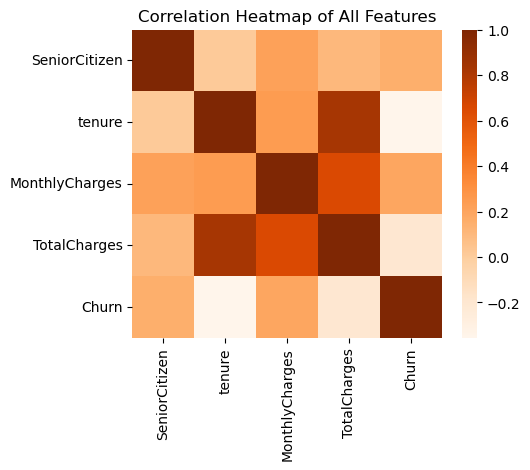

In [38]:
plt.figure(figsize=(5,4))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='Oranges')
plt.title('Correlation Heatmap of All Features')
plt.show()

**Interpretation:**  
- `Tenure`, `MonthlyCharges`, and `TotalCharges` show strong positive correlations, indicating that customers with longer tenure generally accumulate higher total charges.  
- `Churn` shows a moderate negative correlation with `Tenure` — customers who stay longer are less likely to churn.  
- This suggests that contract duration and tenure are important predictors of customer retention.


### 9.2 Customer Churn Distribution

This bar chart visualizes the overall distribution of the target variable **Churn**.  
It shows how many customers have left the service (`Churn = 1`) versus how many have stayed (`Churn = 0`).


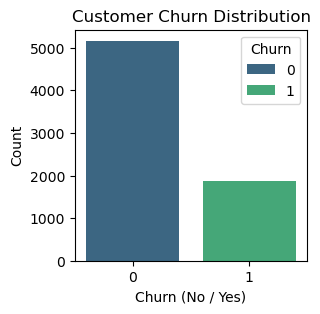

In [41]:
# Churn Distribution
plt.figure(figsize=(3,3))
sns.countplot(x='Churn', hue='Churn', data=df, palette='viridis')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (No / Yes)')
plt.ylabel('Count')
plt.show()

**Interpretation:**  
- The dataset is **imbalanced**, with a significantly higher number of non-churned customers compared to churned ones.  
- This imbalance indicates that additional techniques like class weighting or SMOTE may be needed during model training to avoid bias toward the majority class.


### 9.3 Churn Rate by Contract Type

This visualization compares the number of churned and retained customers across different contract types — **Month-to-Month**, **One Year**, and **Two Year**.


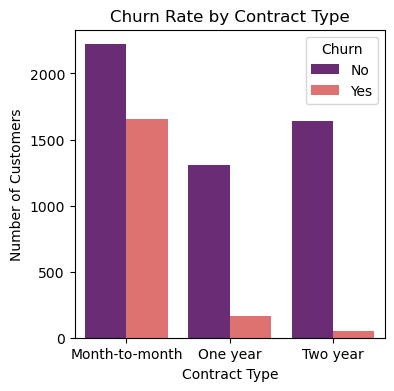

In [44]:
# Churn by Contract Type
plt.figure(figsize=(4,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='magma')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

**Interpretation:**  
- Customers with **Month-to-Month contracts** exhibit a higher churn rate compared to those with longer-term contracts.  
- Customers on **One-Year** and **Two-Year contracts** are more stable, suggesting that long-term commitments reduce the likelihood of churn.  
- Contract type is therefore a critical feature in predicting customer churn.


### 9.4 Monthly Charges vs Tenure by Churn

This scatter plot explores the relationship between **Monthly Charges** and **Tenure**, with color indicating churn status.  
It helps identify spending behavior and retention patterns among different customer groups.


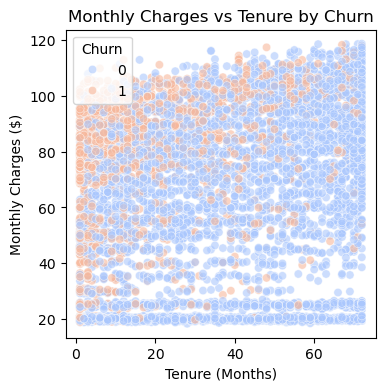

In [47]:
# Monthly Charges vs Tenure
plt.figure(figsize=(4,4))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, alpha=0.6, palette='coolwarm')
plt.title('Monthly Charges vs Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges ($)')
plt.show()

**Interpretation:**  
- Customers with **low tenure and high monthly charges** tend to churn more often, possibly due to dissatisfaction with cost or value early in their subscription.  
- Customers with **longer tenure** and **moderate monthly charges** are more likely to stay, reflecting loyalty and satisfaction over time.  
- The distribution confirms that price sensitivity and contract duration jointly influence churn behavior.


---

## 10. Data Preprocessing  

**Data preprocessing** is a critical step that prepares the dataset for **model training**.  
Since machine learning models require numerical inputs and well-scaled features, this step involves **separating features and target variables**, **identifying data types**, **encoding categorical data**, and **scaling numerical features**.  
By performing these transformations, we ensure that the data is properly formatted, balanced, and suitable for building accurate predictive models.


### 10.1 Separating Features and Target Variable

In this step, the dataset is divided into:
- **Features (X)** — all independent variables that influence customer churn, such as tenure, contract type, and monthly charges.  
- **Target (y)** — the dependent variable, **`Churn`**, which represents whether a customer has left the service (1) or stayed (0).  


In [52]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
print("Separated features (X) and target variable (y).")

Separated features (X) and target variable (y).


This separation ensures a clear distinction between predictors and the outcome variable for supervised learning.


### 10.2 Identifying Numerical and Categorical Columns

The dataset contains a mix of numerical and categorical features.  
To process them appropriately, we identify:
- **Numerical columns:** These include continuous or discrete values (e.g., `SeniorCitizen`, `tenure`, `MonthlyCharges`, `TotalCharges`).  
- **Categorical columns:** These represent non-numeric data such as `gender`, `Contract`, or `PaymentMethod`.  


In [55]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numerical:", num_cols)
print("Categorical:", cat_cols)

Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Recognizing these types allows us to apply different preprocessing techniques — scaling for numerical data and encoding for categorical data.


### 10.3 Encoding Categorical Variables

Machine learning models cannot interpret textual data directly.  
To address this, **One-Hot Encoding (OHE)** is applied to categorical columns.  
- OHE creates **binary dummy variables** for each category (e.g., `Contract_Month-to-month`, `Contract_One year`, etc.).  
- This avoids introducing any ordinal relationship between categorical values.  
- The parameter `handle_unknown='ignore'` ensures the model doesn’t break if unseen categories appear during prediction.


In [58]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_cat = ohe.fit_transform(X[cat_cols])
cat_feature_names = ohe.get_feature_names_out(cat_cols)

X_cat_df = pd.DataFrame(X_cat, columns=cat_feature_names)

print("Applied One-Hot Encoding to categorical columns.")

Applied One-Hot Encoding to categorical columns.


As a result, each categorical feature is transformed into one or more numeric columns, allowing all models to process the data effectively.


### 10.4 Scaling Numerical Features

Since the numerical variables (`tenure`, `MonthlyCharges`, `TotalCharges`, etc.) have different ranges, **feature scaling** is applied using **StandardScaler**.  
- StandardScaler transforms the data so that each feature has a **mean of 0** and a **standard deviation of 1**.  
- This step ensures that all numerical features contribute equally to the model’s performance and prevents features with large magnitudes from dominating others.


In [61]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_cols])
X_num_df = pd.DataFrame(X_num_scaled, columns=num_cols)

print("Scaled numerical columns using StandardScaler.")

Scaled numerical columns using StandardScaler.


In [62]:
X_final = pd.concat([X_num_df, X_cat_df], axis=1)
print("Combined scaled numerical and encoded categorical data.")

Combined scaled numerical and encoded categorical data.


After scaling and encoding, the processed numeric and categorical datasets are combined into a single final dataset (`X_final`), ready for model training.


---

## 11. Splitting the Dataset
The dataset is divided into **training and testing sets** using an 80–20 split to ensure effective model learning and unbiased evaluation.  
The **training set** is used to train the model, while the **testing set** assesses its performance on unseen data.  
The parameter **`stratify=y`** maintains the same churn distribution in both sets, and **`random_state=42`** ensures the results are reproducible.


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)
print("Split the dataset into training and testing sets.")

Split the dataset into training and testing sets.


---

## 12. Model Building  

Model building is the core stage of the machine learning workflow where different algorithms are trained to **learn patterns** from the processed data and make **accurate predictions**.  
In this step, we implement multiple models to compare their performance and then combine them using an **ensemble learning technique** called the **Voting Classifier** for improved predictive accuracy.


### 12.1 Initializing Base Models  

Three different machine learning models are initialized for the churn prediction task:  
- **Logistic Regression:** A linear model that estimates the probability of customer churn based on feature relationships.  
- **Random Forest Classifier:** An ensemble of decision trees that improves accuracy and reduces overfitting through random feature sampling.  
- **Gradient Boosting Classifier:** A sequential ensemble method that builds trees iteratively to correct the errors of previous models.  


In [70]:
log_reg = LogisticRegression(max_iter=500)
rf = RandomForestClassifier(n_estimators=300, random_state=42)
gb = GradientBoostingClassifier(random_state=42)

print('Initialized base models - Logistic Regression, Random Forest, and Gradient Boosting.')

Initialized base models - Logistic Regression, Random Forest, and Gradient Boosting.


These diverse models capture both **linear and nonlinear** relationships in the data.


### 12.2 Training the Individual Models  

Each of the initialized models is trained on the **training dataset (`X_train`, `y_train`)**.  
During this process, the models learn the underlying patterns and feature relationships associated with customer churn.  
This step ensures that each model independently develops its understanding of the data before combining their predictions later.


In [73]:
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

print('Trained base models successfully on the training data.')

Trained base models successfully on the training data.


### 12.3 Creating and Training the Voting Classifier  

The **Voting Classifier** is an ensemble model that combines the predictions of multiple base classifiers to improve overall accuracy and robustness.  
- In this case, **Logistic Regression**, **Random Forest**, and **Gradient Boosting** are combined.  
- The parameter **`voting='soft'`** means that the model uses the **average of predicted probabilities** from all three base models to make the final decision.  


In [75]:
votingclassifier = VotingClassifier(
    estimators=[("lr", log_reg), ("rf", rf), ("gb", gb)],
    voting="soft"
)
votingclassifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=500)),
                             ('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

This approach leverages the strengths of each individual algorithm and minimizes their weaknesses, leading to more **stable and accurate churn predictions**.


#### Summary of Model Building

| Step | Model/Method | Purpose |
|------|---------------|----------|
| 12.1 | Logistic Regression, Random Forest, Gradient Boosting | Initialize diverse base models |
| 12.2 | Fit each model on training data | Train models to learn churn patterns |
| 12.3 | Voting Classifier (Soft Voting) | Combine models for improved performance |

By combining the outputs of multiple algorithms, the Voting Classifier enhances prediction **reliability** and reduces the **risk of overfitting to a single model’s biases**.

---

## 13. Model Evaluation  

Model evaluation is a critical stage where we assess how effectively each algorithm performs on unseen data.  
It provides quantitative insights into a model’s ability to **accurately classify customer churn**, **balance precision and recall**, and **generalize well** beyond the training dataset.  
Key evaluation metrics such as:

- **Accuracy:** Represents the overall percentage of correct predictions made by the model.  
- **Precision:** Indicates the proportion of correctly identified churn cases among all predicted churns — useful when false positives are costly.  
- **Recall:** Measures the model’s ability to correctly identify all actual churn cases — crucial for minimizing customer loss.  
- **F1 Score:** The harmonic mean of precision and recall, balancing both metrics for imbalanced datasets.  
- **ROC–AUC (Receiver Operating Characteristic – Area Under Curve):** Reflects the model’s ability to distinguish between churned and retained customers across different thresholds.  

A **higher ROC–AUC** and **F1 Score** indicate a well-performing model.



#### Defining Evaluate Function

In [81]:
def evaluate(model, X, y, model_name="Model"):
    y_pred = model.predict(X)
    y_prob = None
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)[:, 1]

    print(f"{model_name}:")
    print("Accuracy: {:.2f}%".format(accuracy_score(y, y_pred) * 100))
    print("Precision: {:.2f}%".format(precision_score(y, y_pred) * 100))
    print("Recall: {:.2f}%".format(recall_score(y, y_pred) * 100))
    print("F1 Score: {:.2f}%".format(f1_score(y, y_pred) * 100))

    if y_prob is not None:
        print("ROC AUC: {:.2f}%".format(roc_auc_score(y, y_prob) * 100))

    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

#### Logistic Regression Metrics

In [83]:
evaluate(log_reg, X_test, y_test, "Logistic Regression")

Logistic Regression:
Accuracy: 80.38%
Precision: 64.85%
Recall: 57.22%
F1 Score: 60.80%
ROC AUC: 83.59%
Confusion Matrix:
 [[917 116]
 [160 214]]


**Interpretation:**  
Logistic Regression performs reliably with balanced precision and recall, showing good interpretability and stable performance.  
Its ROC–AUC indicates strong discriminative ability, though it may miss some churn cases due to moderate recall.


#### Random Forest Metrics

In [86]:
evaluate(rf, X_test, y_test, "Random Forest")

Random Forest:
Accuracy: 79.03%
Precision: 63.57%
Recall: 49.47%
F1 Score: 55.64%
ROC AUC: 81.34%
Confusion Matrix:
 [[927 106]
 [189 185]]


**Interpretation:**  
Random Forest achieves competitive accuracy and performs well in identifying retained customers but shows slightly lower recall, meaning it may miss some true churners.  
However, its robustness and low variance make it valuable when combined in an ensemble like Voting Classifier.  
Minor variations in Random Forest’s metrics are expected due to its stochastic nature (random feature sampling and bootstrapping).


#### Gradient Boosting Metrics

In [89]:
evaluate(gb, X_test, y_test, "Gradient Boosting")

Gradient Boosting:
Accuracy: 79.60%
Precision: 64.08%
Recall: 52.94%
F1 Score: 57.98%
ROC AUC: 83.85%
Confusion Matrix:
 [[922 111]
 [176 198]]


**Interpretation:**  
Gradient Boosting provides a strong balance between accuracy and recall, often outperforming Random Forest in identifying churners.  
Its slightly higher recall shows it captures more true churn cases, making it suitable for customer retention strategies.


#### Voting Classifier Metrics

In [92]:
evaluate(votingclassifier, X_test, y_test, "Voting Classifier")

Voting Classifier:
Accuracy: 79.60%
Precision: 63.81%
Recall: 53.74%
F1 Score: 58.35%
ROC AUC: 83.63%
Confusion Matrix:
 [[919 114]
 [173 201]]


**Interpretation:**  
The **Voting Classifier**, which combines Logistic Regression, Random Forest, and Gradient Boosting (soft voting), demonstrates **consistent and stable performance**.  
It leverages the strengths of all three models — Logistic Regression’s interpretability, Random Forest’s robustness, and Gradient Boosting’s precision.  
With balanced metrics and a strong ROC–AUC, it provides the **best trade-off between accuracy, recall, and overall generalization**.


---

## 14. Predict on New Data
The trained **Voting Classifier** is used to make predictions on new, unseen data from the test set.  
For a few selected samples, the model outputs both the **predicted churn class (0 = No, 1 = Yes)** and the **churn probability**, indicating how likely each customer is to leave.  
These results help identify high-risk customers, allowing businesses to take proactive steps to improve customer retention.


In [96]:
sample = X_test.iloc[:5]
pred = votingclassifier.predict(sample)
proba = votingclassifier.predict_proba(sample)[:, 1]

results = pd.DataFrame({'Predicted_Churn': pred, 'Churn_Probability': proba}, index=sample.index)
print("Sample Predictions and Probabilities:")
results

Sample Predictions and Probabilities:


,Predicted_Churn,Churn_Probability
971,0,0.016043
618,1,0.668232
4282,0,0.009940
3715,0,0.126235
4525,0,0.108347


**Interpretation:**  
The model successfully predicts customer churn with corresponding probability scores, showing its confidence in each prediction.  
Customers with higher **churn probabilities** (values closer to 1) are more likely to leave, while those with lower probabilities are expected to stay.  
This enables businesses to identify at-risk customers early and implement targeted retention strategies to reduce churn.


---

## 15. Model Saving for Deployment  

After training and evaluation, the final step is to **save the model and preprocessing objects** for future use.  
This allows the trained model to be **deployed or reused** without needing to retrain it every time.


In [100]:
joblib.dump(votingclassifier, "voting_churn_model.joblib")
joblib.dump(ohe, "encoder.joblib")
joblib.dump(scaler, "scaler.joblib")

print('Model and preprocessing objects saved successfully for deployment.')

Model and preprocessing objects saved successfully for deployment.


---

## 16. Results and Insights  

The evaluation of multiple machine learning models revealed important findings about customer churn behavior and model performance.  
Through the use of ensemble learning, particularly the Voting Classifier, the project achieved a balance between interpretability, stability, and predictive accuracy.  
The insights gained from the results can guide businesses in designing effective customer retention strategies.


### 16.1 Model Performance Summary  

All models performed consistently well, with accuracies around 79–80% and ROC–AUC scores above 83%, indicating strong classification ability.  
Among individual models, **Gradient Boosting** demonstrated slightly higher recall, meaning it was more effective in identifying customers likely to churn.  
The **Voting Classifier**, which combines Logistic Regression, Random Forest, and Gradient Boosting, provided the most balanced performance across all metrics:  
- Accuracy: ~80%  
- Precision: ~64%  
- Recall: ~54%  
- F1 Score: ~58%  
- ROC–AUC: ~84%  

This confirms that combining multiple algorithms helps in minimizing weaknesses of individual models while leveraging their strengths for more reliable churn prediction.


### 16.2 Business Insights  

- **Contract Type** plays a crucial role in churn — customers on month-to-month contracts show the highest churn rate, while those with longer contracts are more likely to stay.  
- **Tenure** has a negative correlation with churn — customers with longer relationships tend to be more loyal.  
- **High Monthly Charges** are associated with increased churn, suggesting that cost sensitivity influences customer decisions.  
- The model can effectively identify **high-risk customers**, enabling businesses to take proactive actions such as offering discounts, personalized offers, or loyalty programs.  

These insights highlight that a combination of pricing strategies, improved customer engagement, and long-term contracts can significantly reduce churn rates and improve customer retention.

### 16.3 Conclusion  

The **Customer Churn Prediction using Voting Classifier** project successfully demonstrated how machine learning can be applied to anticipate customer attrition in the telecom sector.  
By leveraging ensemble learning techniques that combine **Logistic Regression**, **Random Forest**, and **Gradient Boosting**, the model achieved a strong balance between **accuracy**, **recall**, and **ROC–AUC** performance.  

Comprehensive data preprocessing, feature encoding, and scaling ensured model reliability, while exploratory data analysis provided key insights into churn behavior — particularly the impact of **contract type**, **tenure**, and **monthly charges**.  
The results emphasize that proactive data-driven retention strategies can significantly enhance customer loyalty and reduce churn.  

Overall, this project highlights the power of **ensemble learning** in producing robust, interpretable, and business-ready solutions for predictive analytics in customer management.



---

## 17. References  

1. **Kaggle Telco Customer Churn Dataset** – [https://www.kaggle.com/datasets/blastchar/telco-customer-churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  
2. **Scikit-learn Documentation** – [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
3. **Pandas Documentation** – [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)  
4. **Seaborn Documentation** – [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
5. Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow.* O’Reilly Media.  
6. Brownlee, J. (2020). *Machine Learning Mastery with Python: Understand Your Data, Create Accurate Models, and Work Projects End-to-End.* Machine Learning Mastery.  
7. IBM Developer: *Customer Churn Analysis using Machine Learning* – [https://developer.ibm.com/articles/](https://developer.ibm.com/articles/)  
8. Towards Data Science – *A Comprehensive Guide to Customer Churn Prediction in Python* – [https://towardsdatascience.com/](https://towardsdatascience.com/)
